In [1]:
import sys
sys.path.append("..")

from cellmate.image_measure import ImageMeasure
from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt
from cellmate.visualize import COLORMAP
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2

color_mont_list = COLORMAP['mont'].list()
color_mont_linear = COLORMAP['mont'].linear()

In [2]:
image = imread("./figure_morphology_quantification/0006.tif")
labels = [1008, 1270]
mask = np.isin(image[0], labels)
image_measure = ImageMeasure(image[0]*mask)

colors = [mpl.colors.LinearSegmentedColormap.from_list("",color_mont_list([3,0])), 
          mpl.colors.LinearSegmentedColormap.from_list("",color_mont_list([5,0]))]

In [3]:
two_label = labels
bbox0 = image_measure.bbox(label=two_label[0])
bbox1 = image_measure.bbox(label=two_label[1])

pad = 20
shift_x = max(0, min(bbox0[0], bbox1[0])-pad)
shift_y = max(0, min(bbox0[1], bbox1[1])-pad)
cropped_image = image[1][shift_x:max(bbox0[2], bbox1[2])+pad,
                      shift_y:max(bbox0[3], bbox1[3])+pad]

cropped_mask = image[0][shift_x:max(bbox0[2], bbox1[2])+pad,
                      shift_y:max(bbox0[3], bbox1[3])+pad]

distance = image_measure.distance(two_label[0], two_label[1],'label')
between_angle = image_measure.between_angle(two_label[0], two_label[1],'label')
between_angle_index = image_measure.between_angle_index(two_label[0], two_label[1],'label', norm=True)


/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_52538/697607480.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1].scatter(near_point[1], near_point[0],
/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_52538/697607480.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0))
/var/fo

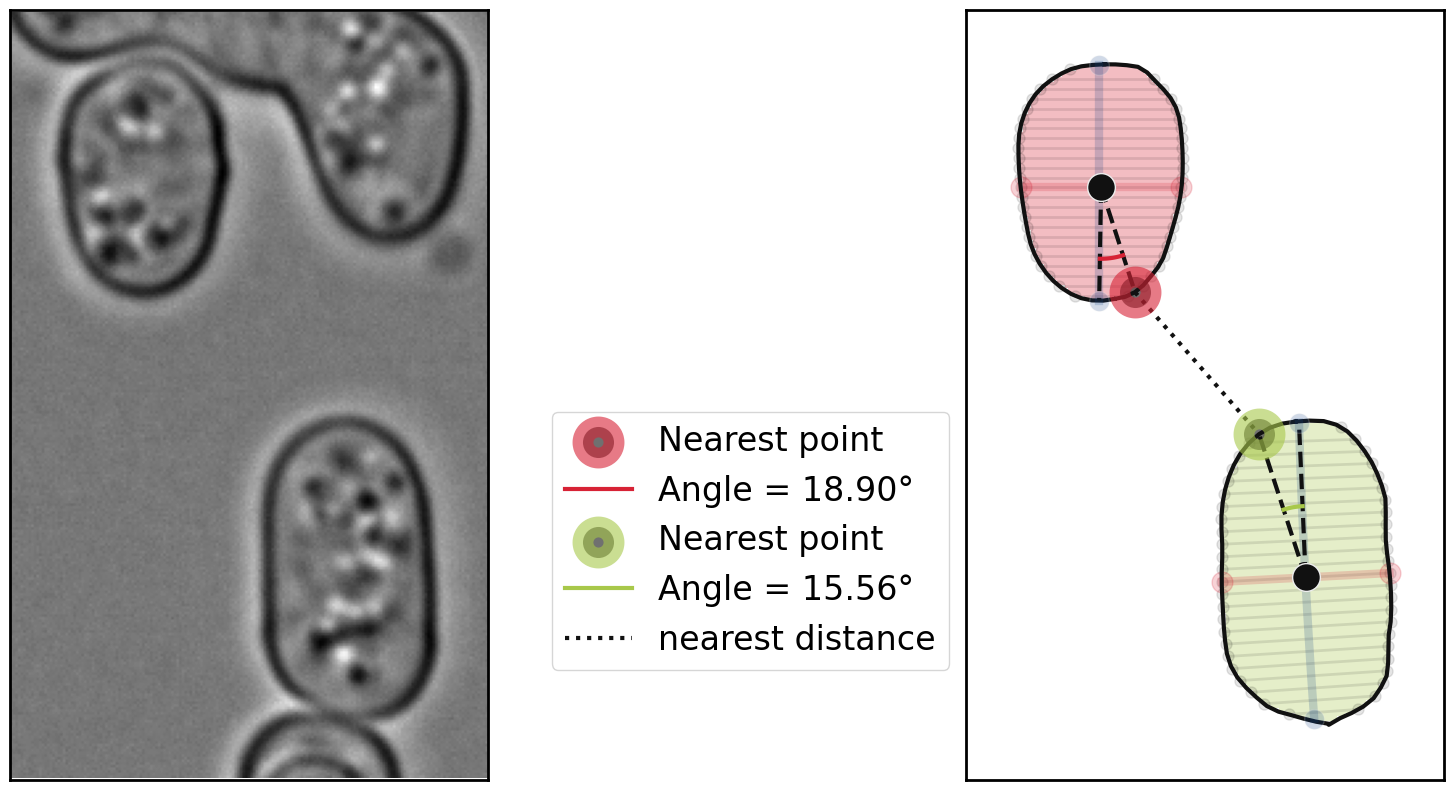

In [4]:
f, axs = plt.subplots(1, 2, figsize=(18.5,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)

near_points = []
axs[0].imshow(cropped_image, cmap='gray')

for i in range(0, len(two_label)):
    coord = image_measure.coordinate(label=two_label[i])-[shift_x, shift_y]
    coord = np.vstack([coord, coord[0:1]])
    skeleton = image_measure.skeleton(label=two_label[i])-[shift_x, shift_y]
    center = image_measure.center(label=two_label[i])-[shift_x, shift_y]
    minor_grid = image_measure.skeleton_minor_grid(label=two_label[i])-[shift_x, shift_y]

    if i == 0:
        start_p = skeleton[-1]
        end_p = skeleton[0]
    else:
        start_p = skeleton[0]
        end_p = skeleton[-1]

    near_point = coord[distance[0, 0, i+2]]
    near_points.append(near_point)
    minor_axis = image_measure.skeleton_minor_axis(label=two_label[i])-[shift_x, shift_y]


    mymask =np.ma.masked_where((cropped_mask!=two_label[i]), cropped_mask)
    axs[1].imshow(mymask, alpha=0.3, cmap=colors[i])


    axs[1].scatter(near_point[1], near_point[0], 
                   marker="o", s=500, c=color_mont_list(7),
                   zorder=10, edgecolors=colors[i](0), linewidth=15,
                   alpha=0.6,
                   label='Nearest point')

    axs[1].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0))
    axs[1].scatter(start_p[1], start_p[0], marker="o", s=200, c=color_mont_list(1),  zorder=9, edgecolors=color_mont_list(0), alpha=0.2)
    axs[1].scatter(end_p[1], end_p[0], marker="o", s=200, c=color_mont_list(1),  zorder=9, edgecolors=color_mont_list(0), alpha=0.2)


    axs[1].plot(minor_grid[0][0:1,1], minor_grid[0][0:1,0], 'o-', c='black', alpha=0.1, linewidth=2.0,markersize=8)
    for j in range(1, len(minor_grid)):
        axs[1].plot(minor_grid[j][:,1], minor_grid[j][:,0], 'o-', c='black', alpha=0.1, linewidth=2.0,markersize=8)
    
    axs[1].plot(minor_axis[:,1], minor_axis[:,0], 'o-', c=color_mont_list(3), linewidth=6.0, markersize=15, alpha=0.2)
    
    axs[1].plot(coord[:, 1], coord[:, 0], c=color_mont_list(7), linewidth=3.0)
    
    
    
    axs[1].plot(skeleton[:, 1], skeleton[:, 0], c=color_mont_list(1), linewidth=6.0, alpha=0.2)
    
    axs[1].plot([center[1], near_point[1]], [center[0], near_point[0]], '--', linewidth=3.0,c=color_mont_list(7))
    axs[1].plot([center[1], start_p[1]], [center[0], start_p[0]], '--', linewidth=3.0,c=color_mont_list(7))

    # Draw the angle arc between the vectors
    x1, y1 = center[1], center[0]  # The common starting point of both vectors
    x2, y2 = near_point[1], near_point[0]  # End point of vector v1
    x3, y3 = start_p[1], start_p[0]  # End point of vector v2

# Calculate the vectors
    v1 = np.array([x2 - x1, y2 - y1])  # Vector from (x1, y1) to (x2, y2)
    v2 = np.array([x3 - x1, y3 - y1])  # Vector from (x1, y1) to (x3, y3)
    
    # Calculate the angle between the vectors using dot product
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
    theta = np.arccos(cos_theta)
    
    # Convert the angle to degrees for easy interpretation
    theta_deg = np.degrees(theta)
    
    
    # Draw the angle arc between the vectors
    angle_radius = 27  # Adjust the radius of the angle arc
    angle_points = np.linspace(0, theta, 100)  # Points to draw the arc
    
    # The arc will be drawn relative to the x-axis, and then rotated to match the direction of v1
    arc_x = angle_radius * np.cos(angle_points)
    arc_y = angle_radius * np.sin(angle_points)
    
    # Rotate the arc to align with the first vector's direction
    angle_of_v1 = np.arctan2(v1[1], v1[0])  # Find the angle of v1 with respect to the x-axis
    arc_rotated_x = arc_x * np.cos(angle_of_v1) - arc_y * np.sin(angle_of_v1)
    arc_rotated_y = arc_x * np.sin(angle_of_v1) + arc_y * np.cos(angle_of_v1)
    axs[1].plot(arc_rotated_x + x1, arc_rotated_y + y1, 'g', c=colors[i](0),linewidth=3.0, label=f'Angle = {theta_deg:.2f}°')

near_points = np.array(near_points)
axs[1].plot(near_points[:, 1], near_points[:, 0], ':',c=color_mont_list(7), linewidth=3.0, label="nearest distance")

axs[1].legend(bbox_to_anchor=(0.0, 0.5),fontsize=24)

axs[0].axis('equal')
axs[1].axis('equal')

axs[1].set_xticks([])
axs[1].set_yticks([])
axs[0].set_xticks([])
axs[0].set_yticks([])

# f.suptitle("Cellular Geometric Feature Quantification Across Mating Phases", fontsize=52)
plt.savefig("./figure_morphology_quantification/between.svg", dpi=300)

